# Video Game Console Analysis

## 1. Introduction

The analysis involves examining data to identify trends influencing a game's success. The dataset contains information dating back to 2016, including user and expert reviews, game genres, supported platforms (such as Xbox and PlayStation), and historical sales data from open sources. Additionally, it incorporates ESRB (Entertainment Software Rating Board) abbreviations, indicating age ratings ranging from Teen to Mature based on content.

The main objective is to uncover patterns in the data to inform strategic decisions, particularly in planning advertising campaigns for the upcoming year. Despite the current timeframe being December 2016, this analysis lays the groundwork for forecasting and strategizing campaigns for 2017. Effectively utilizing this dataset is essential for identifying potential blockbuster titles and optimizing marketing efforts to increase sales and revenue for Ice.

## 2. Import Data

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math

## 3. Data Preparation

In [2]:
# Import the data

filepath = './data/games.csv'
column_names = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

try:
    games_df = pd.read_csv(filepath, header=0, names=column_names)
except FileNotFoundError as e:
    print(f"The file at [{filepath}] was not found. The following error: {e} occurred.\nTry again!")
else:
    print(f"The file at the filepath: [{filepath}] was imported.")

The file at the filepath: [./data/games.csv] was imported.


In [3]:
# Initial Observations

games_df.info()
games_df.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Observations**

The dataset comprises 11 columns, each providing specific information about various video games. Upon initial inspection, it becomes apparent that some columns have data types inconsistent with their descriptions.

- The `year_of_release` column is presently of type `float64` and should be converted to type `int64`.
- The `user_score` column is currently of object data type; it would be more appropriate to convert it to a numerical data type to facilitate calculations.

Regarding missing values, several columns exhibit incomplete data: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.

For `name`, `genre`, and `rating`, missing values will be addressed using by either dropping or replacing the values:
- Rows with missing values in the `name` and `genre` columns will be removed, affecting only a small fraction of the dataset (approximately 1 to 3 records), thus preserving data integrity. 
- For the categorical `rating` column, missing values will be filled with the string `'unknown'`. Since these columns primarily serve to categorize data, introducing an `'unknown'` category for each will minimally disrupt the dataset. Removing these values would significantly impact dataset integrity due to their prevalence.

For the columns `critic_score`, `user_score`, and `year_of_release`, missing values will be addressed using dispersion methods such as mean or median:
- The `year_of_release` column will be filled with the median value for that column. This approach, impacting approximately 200 records, maintains data integrity. However, for a larger number of missing values, it might pose challenges.
- For missing `user_score` values, we will replace them with the mean for that column. Since the value ranges between 1 and 10, excluding zero, the mean is expected to be relatively stable and can effectively fill missing values in that column.
  - The string value `'tbd'` will be converted to `NaN` (missing value) and then replaced with the mean, similar to other values. Considering that the user score typically falls between 1 and 10, `'tbd'` can be interpreted as missing data. To ensure this distinction is preserved for future analysis, a new binary column named `score_is_tbd` will be created. In this column, `'tbd'` will be represented as `1`, indicating missing or to-be-determined scores, while actual scores or `NaN` values will be represented as `0`.
- For `critic_score`, missing values will be grouped by `genre` and `rating` and replaced with the median for those groups, providing a more contextualized approach to handling missing data. Any remaining missing values will be grouped by the `year_of_release` and filled with the median as well.


In [4]:
# handle name and genre missing values
games_df.dropna(subset=['name', 'genre'], inplace=True)

# handle rating missing values
games_df['rating'] = games_df['rating'].fillna('unknown')

# handle year_of_release missing values and data conversion
games_df['year_of_release'].fillna(games_df['year_of_release'].median(), inplace=True)
games_df['year_of_release'] = games_df['year_of_release'].astype('int')

# handle critic_score missing values
games_df['critic_score'] = games_df['critic_score'].fillna(games_df.groupby(['genre', 'rating'])['critic_score'].transform('median'))
games_df['critic_score'].fillna(games_df['critic_score'].median(), inplace=True)


# handle user_score missing values and data conversion
games_df.insert(10, 'u_score_is_tbd', np.where(games_df['user_score'] == 'tbd', 1, 0))
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')
games_df['user_score'] = round(games_df['user_score'].fillna(games_df['user_score'].mean()), 2)

In [5]:
# feature engineering

games_df.insert(8, 'total_sales', games_df['na_sales'] + games_df['jp_sales'] + games_df['eu_sales'] + games_df['other_sales'])
games_df.insert(0, 'game_id', games_df.index)

In [6]:
# Check for duplicates in the dataset

games_df.duplicated().sum()

0

In [7]:
# Re-observe data -- ensure everything is correct

games_df.info()
games_df.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_id          16713 non-null  int64  
 1   name             16713 non-null  object 
 2   platform         16713 non-null  object 
 3   year_of_release  16713 non-null  int64  
 4   genre            16713 non-null  object 
 5   na_sales         16713 non-null  float64
 6   eu_sales         16713 non-null  float64
 7   jp_sales         16713 non-null  float64
 8   other_sales      16713 non-null  float64
 9   total_sales      16713 non-null  float64
 10  critic_score     16713 non-null  float64
 11  user_score       16713 non-null  float64
 12  u_score_is_tbd   16713 non-null  int64  
 13  rating           16713 non-null  object 
dtypes: float64(7), int64(3), object(4)
memory usage: 1.9+ MB


,game_id,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,u_score_is_tbd,rating
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.00,0,E
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,70.0,7.13,0,unknown
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.30,0,E
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.00,0,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,75.0,7.13,0,unknown
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,68.0,7.13,0,unknown
6,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.50,0,E
7,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.60,0,E
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.40,0,E
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,67.0,7.13,0,unknown


## 4. Data Analysis

#### 4.1. Data Significance

Based on initial observations, the data indeed seems significant for understanding trends and patterns in video game releases over the specified period. The dataset demonstrates a substantial number of observations per year, indicating a robust sample size for analysis. While 1980 stands out with only 9 games released, subsequent years show a consistent increase in the number of releases. This upward trend suggests a growing and evolving video game industry during the period covered by the dataset. 

In [8]:
# Finding number of games released by year

release_by_year = games_df.groupby('year_of_release')['game_id'].count()
print(release_by_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1466
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: game_id, dtype: int64


#### 4.2. Platform to Platform Sales


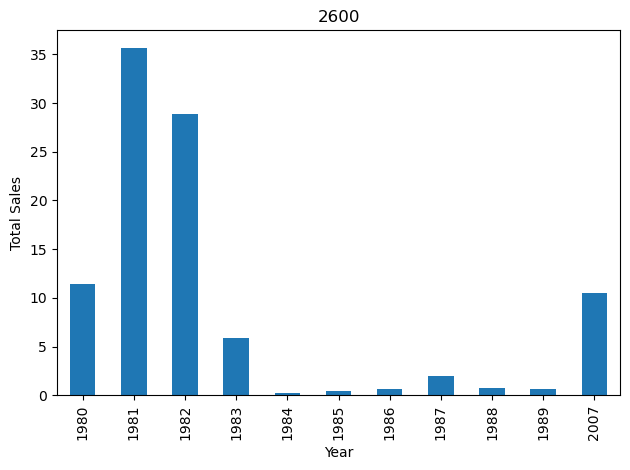

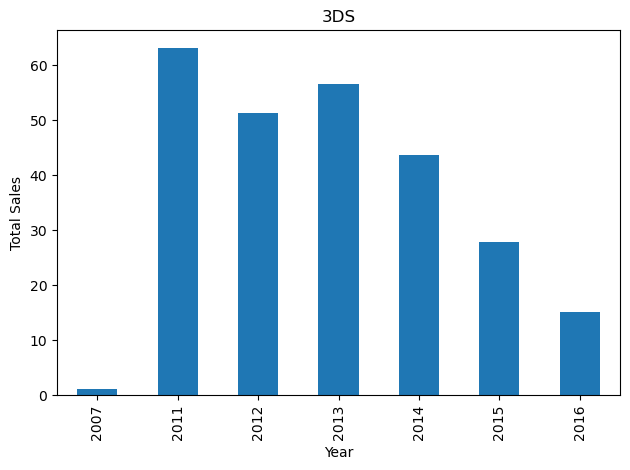

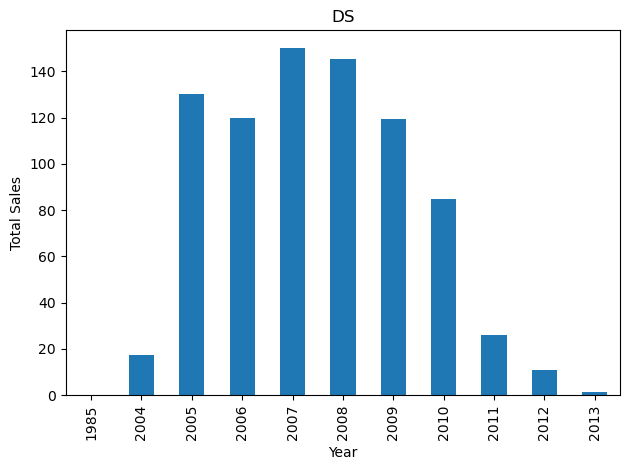

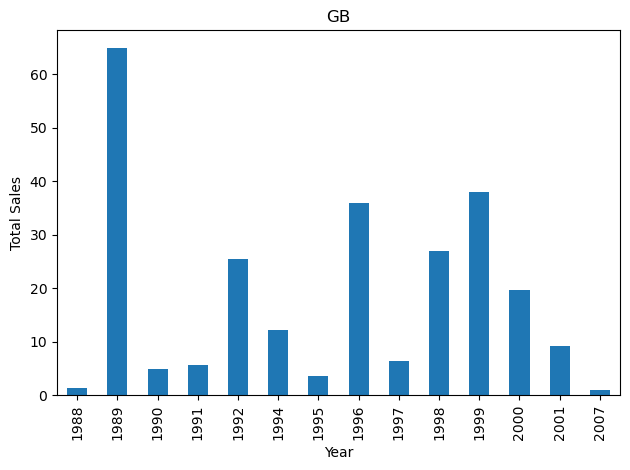

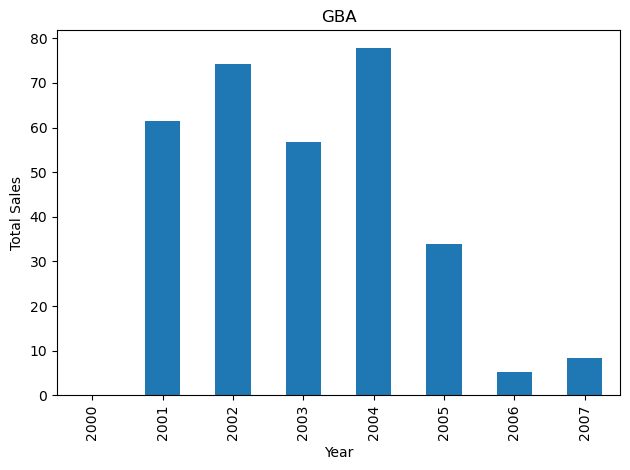

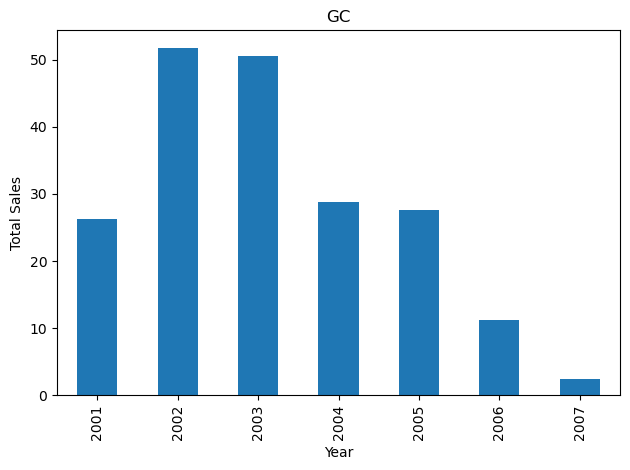

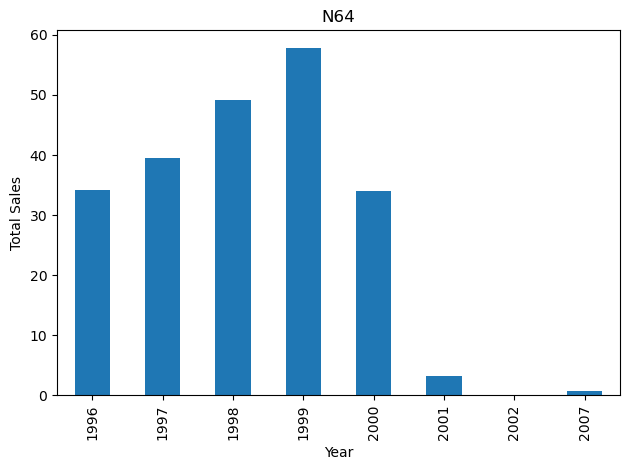

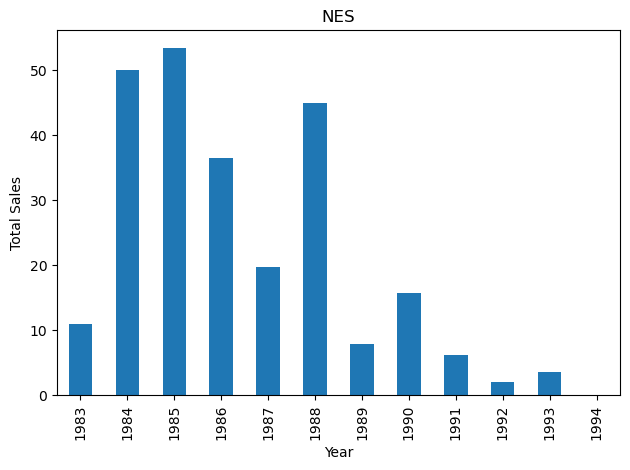

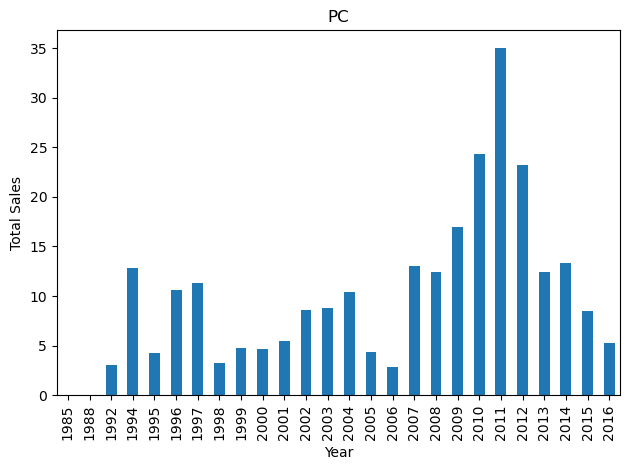

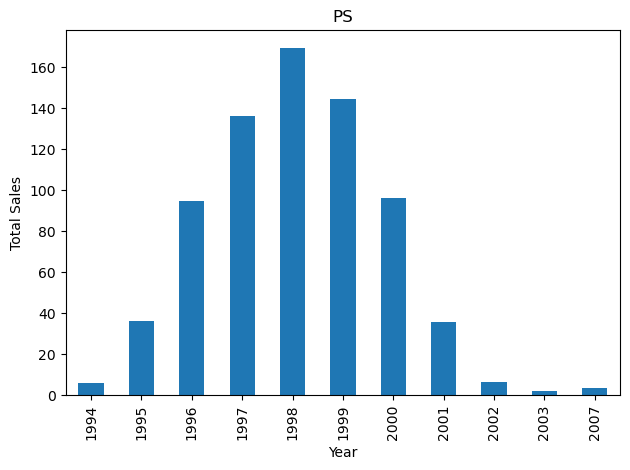

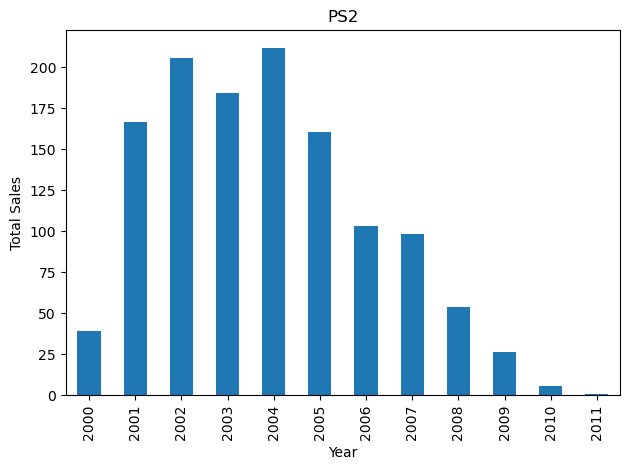

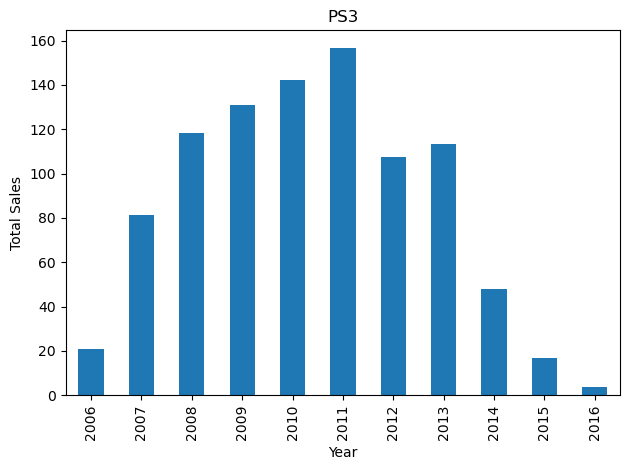

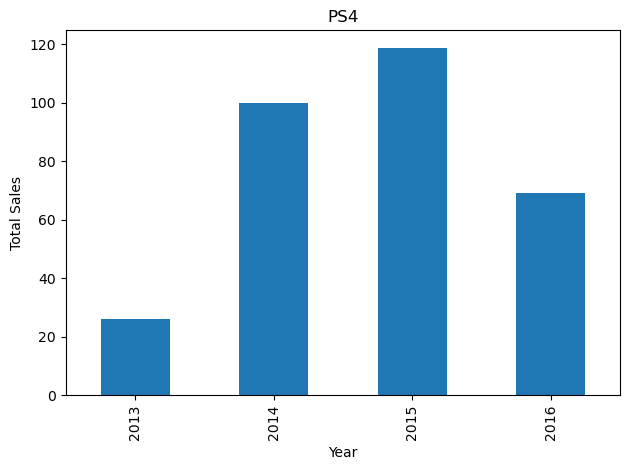

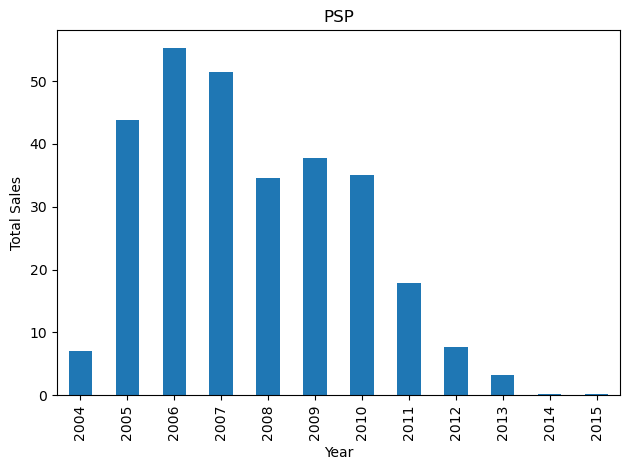

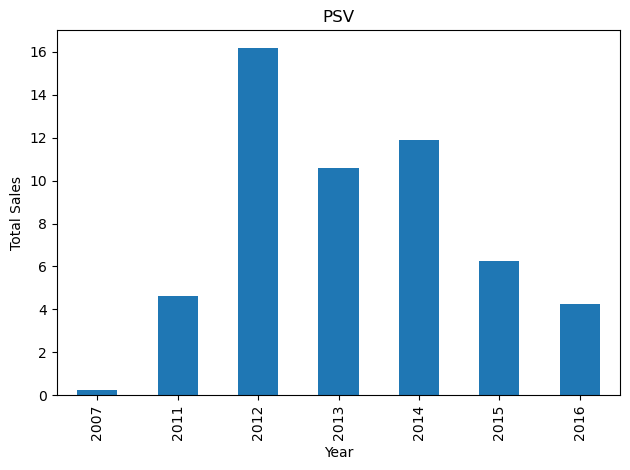

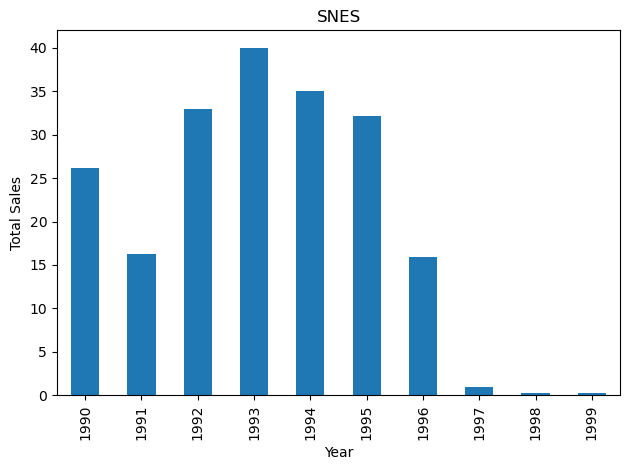

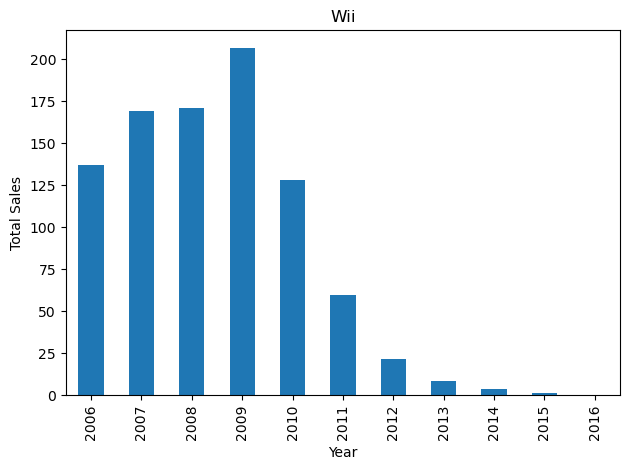

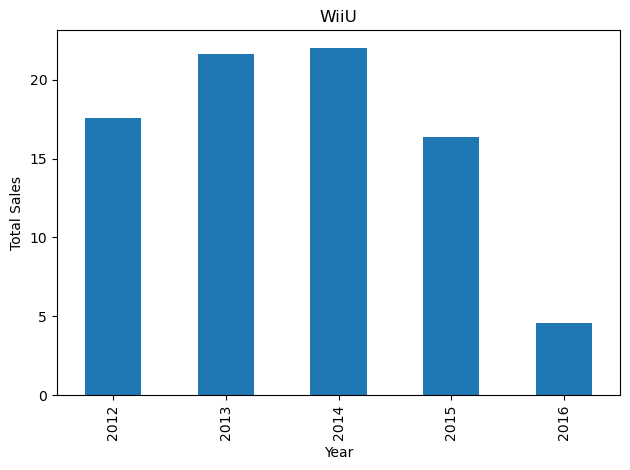

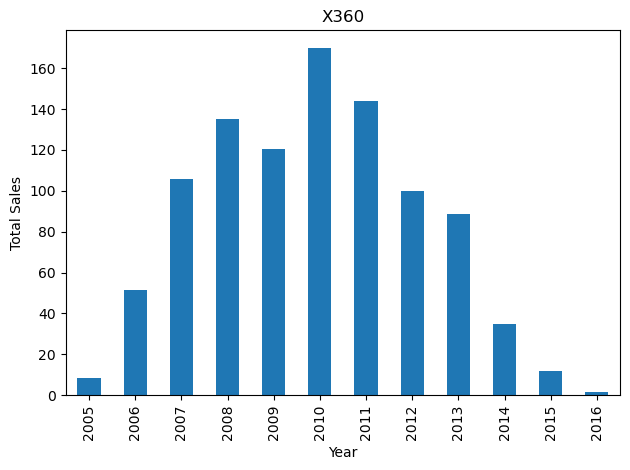

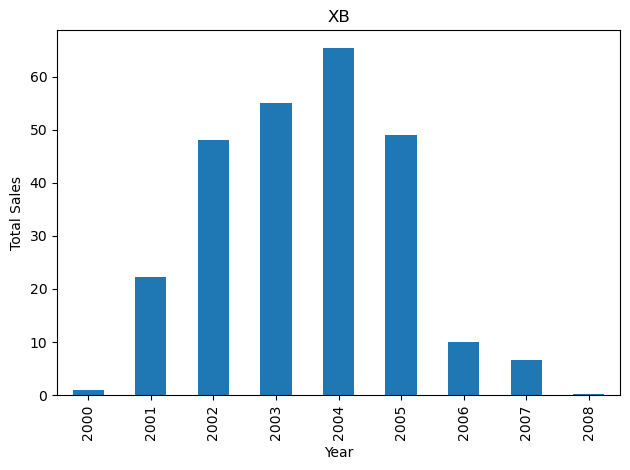

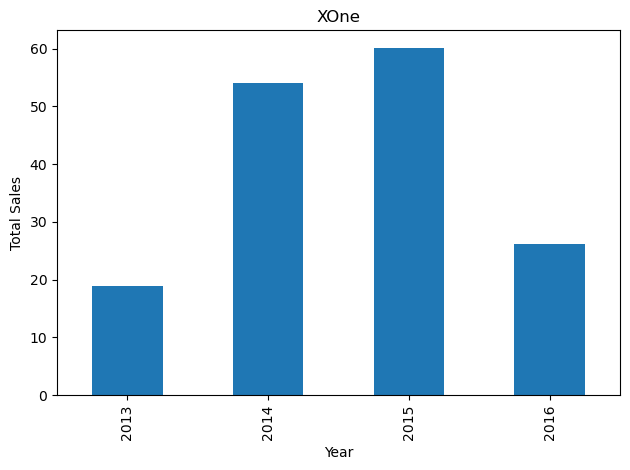

In [9]:
# Grouping data by platform & summing total sales
platform_sales = games_df.groupby('platform')['total_sales'].sum()

# Filtering out only platforms with over 50 million in sales & creating a list
platforms_over_50 = platform_sales[platform_sales > 50].index.tolist()

# Filtering out original df to only include platforms that sold over 50 mil
df_games_filtered = games_df[games_df['platform'].isin(platforms_over_50)]

# Group the filtered DataFrame by 'platform'
grouped_by_platform = df_games_filtered.groupby('platform')

# Determine total sales grouped platform
platform_sales = grouped_by_platform['total_sales'].sum().reset_index()

# Plot bar charts by platform
for platform, group_data in grouped_by_platform:
    group_data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', title=platform)
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.tight_layout()
    plt.show()


In [13]:
# Find platforms leading in sales
platform_sales = platform_sales.sort_values(by='total_sales', ascending=True)
platform_sales

,platform,total_sales
14,PSV,54.07
17,WiiU,82.19
0,2600,96.98
20,XOne,159.32
5,GC,198.93
15,SNES,200.04
6,N64,218.68
7,NES,251.05
3,GB,255.46
19,XB,257.74


In [11]:
# Pivot table for platform, release year and total  sales

sales_pivot_table = df_games_filtered.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value=0)

sales_pivot_table

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,10.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.19,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,150.28,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,...,1.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,8.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NES,0.00,0.00,0.00,10.96,50.08,53.44,36.41,19.76,45.01,7.85,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.03,0.00,...,13.04,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25


Based on the depicted graphs (for platforms exceeding 50 million in sales), it appears that platforms generally maintain sales momentum for approximately 10 years before tapering off. This suggests that a new platform tends to emerge in the market approximately every decade or so.

#### 4.3. Determining Appropiate Data

The findings from the data analysis suggest that for constructing a model aimed at predicting trends in 2017, it's crucial to incorporate data spanning the preceding decade, starting from 2007. This period is deemed most pertinent because consoles utilized between 1997 and 2007 exhibit minimal sales activity and are likely to become obsolete by 2010. Consequently, the optimal approach for modeling 2017 involves leveraging data ranging from 2007 to 2016.

The platforms leading in all-time sales are:
- PS4
- GBA
- PS
- DS
- Wii
- PS3
- X360
- PS2

The platforms that are growing are:
- PC
- PS4
- XOne

The platforms that are shrinking are:
- X360
- PS2
- PSP
- PS3
- Wii
- WiiU


## 5. User Profile by Region

## 6. Hyptohesis Testing

## 7. Conclusion